In [12]:
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
housing = pd.read_csv('./housing_renamed.csv')
housing.head()

,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan


In [5]:
house1 = smf.glm('value_per_sq_ft ~ units + sq_ft + boro', data=housing).fit()

In [6]:
house1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
========================================================================
Model:                 GLM                AIC:              27256.0311  
Link Function:         identity           BIC:              4901769.4219
Dependent Variable:    value_per_sq_ft    Log-Likelihood:   -13621.     
Date:                  2018-04-16 16:05   LL-Null:          -14827.     
No. Observations:      2626               Deviance:         4.9224e+06  
Df Model:              6                  Pearson chi2:     4.92e+06    
Df Residuals:          2619               Scale:            1879.5      
Method:                IRLS                                             
------------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
Intercept              43.2909   5.3299  8.1223 0.0000  32.8445  53.7372
boro[T.Brooklyn]       34.5621   5.5351  6.2442 0.0000  23.7136  45.4107
boro[T.Manhattan]     130.9924   5.3846 24.3271 0.0000 120.4387 141.5461
boro[T.Queens]         32.9937   5.6626  5.8266 0.0000  21.8953  44.0921
boro[T.Staten Island]  -3.6303   9.9930 -0.3633 0.7164 -23.2161  15.9556
units                  -0.1881   0.0221 -8.5113 0.0000  -0.2314  -0.1448
sq_ft                   0.0002   0.0000 10.0785 0.0000   0.0002   0.0003
========================================================================

"""

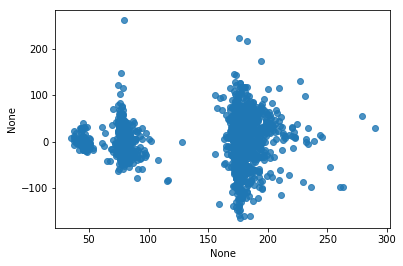

In [8]:
sns.regplot(x=house1.fittedvalues, y=house1.resid_deviance, fit_reg=False)

In [9]:
res_df = pd.DataFrame({'fitted_values':house1.fittedvalues, 'resid_deviance':house1.resid_deviance, 'boro':housing['boro']})

In [10]:
res_df.head()

,boro,fitted_values,resid_deviance
0,Manhattan,174.059177,25.940823
1,Manhattan,186.199265,56.560735
2,Manhattan,196.781144,-32.631144
3,Manhattan,173.621149,97.608851
4,Manhattan,175.488537,71.991463


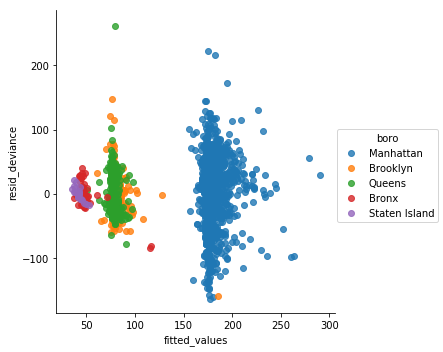

In [11]:
sns.lmplot(x='fitted_values', y='resid_deviance', data=res_df, hue='boro',fit_reg=False)

In [13]:
resid = house1.resid_deviance.copy()

In [14]:
resid_std = stats.zscore(resid)

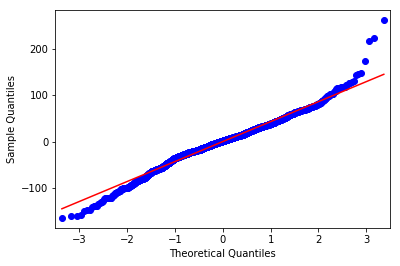

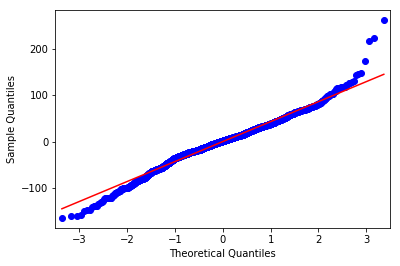

In [15]:
statsmodels.graphics.gofplots.qqplot(resid,line='r')

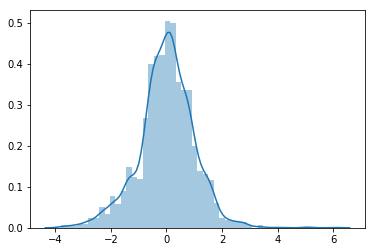

In [16]:
sns.distplot(resid_std)

In [17]:
f1 = 'value_per_sq_ft ~ units + sq_ft + boro'
f2 = 'value_per_sq_ft ~ units * sq_ft + boro'
f3 = 'value_per_sq_ft ~ units + sq_ft * boro + type'
f4 = 'value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type '
f5 = 'value_per_sq_ft ~ boro + type'

In [18]:
house1 = smf.ols(f1, data=housing).fit()
house2 = smf.ols(f2, data=housing).fit()
house3 = smf.ols(f3, data=housing).fit()
house4 = smf.ols(f4, data=housing).fit()
house5 = smf.ols(f5, data=housing).fit()

In [19]:
pd.concat([house1.params, house2.params, house3.params, house4.params, house5.params], axis=1)

,0,1,2,3,4
Intercept,43.290863,4.445184e+01,40.232692,42.925158,38.355879
boro[T.Brooklyn],34.562150,3.231498e+01,28.439269,27.597639,28.230904
boro[T.Manhattan],130.992363,1.270989e+02,115.711927,114.434920,126.801446
boro[T.Queens],32.993674,2.979932e+01,28.553233,27.068852,25.162108
boro[T.Staten Island],-3.630251,-7.542656e+00,-15.640961,-15.941330,-16.950990
sq_ft,0.000210,2.077865e-04,0.000096,-0.000011,NaN
sq_ft:boro[T.Brooklyn],NaN,NaN,-0.000041,-0.000032,NaN
sq_ft:boro[T.Manhattan],NaN,NaN,0.000084,0.000100,NaN
sq_ft:boro[T.Queens],NaN,NaN,-0.000064,-0.000040,NaN
sq_ft:boro[T.Staten Island],NaN,NaN,-0.000017,-0.000016,NaN


In [21]:
mod_results = pd.concat([house1.params, house2.params, house3.params, house4.params, house5.params], axis=1).\
rename(columns=lambda x: 'house'+str(x+1)).\
reset_index().\
rename(columns={'index':'param'}).\
melt(id_vars='param', var_name='model', value_name='estimate')

In [22]:
mod_results.head()

,param,model,estimate
0,Intercept,house1,43.290863
1,boro[T.Brooklyn],house1,34.562150
2,boro[T.Manhattan],house1,130.992363
3,boro[T.Queens],house1,32.993674
4,boro[T.Staten Island],house1,-3.630251


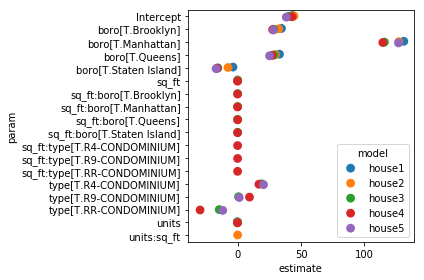

In [23]:
sns.pointplot(x='estimate', y='param', hue='model',data=mod_results,dodge=True,join=False)
plt.tight_layout()

In [25]:
model_names=  ['house1','house2','house3','house4','house5']

In [26]:
house_anova = sm.stats.anova_lm(house1, house2, house3, house4, house5)

/home/farid/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/farid/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/farid/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [27]:
house_anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2619.0,4.922389e+06,0.0,NaN,NaN,NaN
1,2618.0,4.884872e+06,1.0,37517.437605,20.039049,7.912333e-06
2,2612.0,4.619926e+06,6.0,264945.539994,23.585728,2.754431e-27
3,2609.0,4.576671e+06,3.0,43255.441192,7.701289,4.025581e-05
4,2618.0,4.901463e+06,-9.0,-324791.847907,19.275539,NaN


In [28]:
house_anova.index = model_names

In [29]:
house_anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
house1,2619.0,4.922389e+06,0.0,NaN,NaN,NaN
house2,2618.0,4.884872e+06,1.0,37517.437605,20.039049,7.912333e-06
house3,2612.0,4.619926e+06,6.0,264945.539994,23.585728,2.754431e-27
house4,2609.0,4.576671e+06,3.0,43255.441192,7.701289,4.025581e-05
house5,2618.0,4.901463e+06,-9.0,-324791.847907,19.275539,NaN


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
pd.get_dummies(housing[['units','sq_ft','boro']], drop_first=True),
housing['value_per_sq_ft'],
test_size=0.2,
random_state=42)

In [38]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((2100, 6), (526, 6), (2100,), (526,))

In [39]:
lr = LinearRegression().fit(X_train, y_train)

In [40]:
lr.score(X_test, y_test)

0.6137125285030869

In [41]:
from patsy import dmatrices

In [44]:
y, X =dmatrices('value_per_sq_ft ~ units + sq_ft + boro',housing,return_type="dataframe")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.6137125285026593

In [46]:
from sklearn.model_selection import KFold, cross_val_score

In [47]:
housing = pd.read_csv('./housing_renamed.csv')


In [48]:
kf = KFold(n_splits=5)
y,X = dmatrices('value_per_sq_ft ~ units + sq_ft + boro',housing)

coefs =[]
scores=[]

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    lr = LinearRegression().fit(X_train,y_train)
    coefs.append(pd.DataFrame(lr.coef_))
    scores.append(lr.score(X_test,y_test))

In [49]:
len(scores)

5

In [50]:
coefs_df= pd.concat(coefs)
coefs_df.columns = X.design_info.column_names
coefs_df

,Intercept,boro[T.Brooklyn],boro[T.Manhattan],boro[T.Queens],boro[T.Staten Island],units,sq_ft
0,0.0,33.369037,129.904011,32.103100,-4.381085e+00,-0.205890,0.000220
0,0.0,32.889925,116.957385,31.295956,-4.919232e+00,-0.146180,0.000155
0,0.0,30.975560,141.859327,32.043449,-4.379916e+00,-0.179671,0.000194
0,0.0,41.449196,130.779013,33.050968,-3.430209e+00,-0.207904,0.000232
0,0.0,-38.511915,56.069855,-17.557939,3.552714e-15,-0.145829,0.000202


In [52]:
import numpy as np
coefs_df.apply(np.mean)

Intercept                  0.000000
boro[T.Brooklyn]          20.034361
boro[T.Manhattan]        115.113918
boro[T.Queens]            22.187107
boro[T.Staten Island]     -3.422088
units                     -0.177095
sq_ft                      0.000201
dtype: float64

In [53]:
scores

[0.027314162909386815,
 -0.5538362212297154,
 -0.15636371688032624,
 -0.32342020618618794,
 -1.6929655586870154]

In [54]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
scores

array([ 0.02731416, -0.55383622, -0.15636372, -0.32342021, -1.69296556])

In [64]:
y1, X1 = dmatrices('value_per_sq_ft ~ units + sq_ft + boro',housing)
y2, X2 = dmatrices('value_per_sq_ft ~ units * sq_ft + boro',housing)
y3, X3 = dmatrices('value_per_sq_ft ~ units + sq_ft * boro + type',housing)
y4, X4 = dmatrices('value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type ',housing)
y5, X5 = dmatrices('value_per_sq_ft ~ boro + type',housing)
model =LinearRegression()
scores1 = cross_val_score(model, X1, y1, cv=5)
scores2 = cross_val_score(model, X2, y2, cv=5)
scores3 = cross_val_score(model, X3, y3, cv=5)
scores4 = cross_val_score(model, X4, y4, cv=5)
scores5 = cross_val_score(model, X5, y5, cv=5)

In [65]:
scores1

array([ 0.02731416, -0.55383622, -0.15636372, -0.32342021, -1.69296556])

In [66]:
scores_df = pd.DataFrame([scores1,scores2,scores3,scores4,scores5])

In [67]:
scores_df.apply(np.mean, axis=1)

0   -5.398543e-01
1   -1.088184e+00
2   -4.366349e+26
3   -5.258585e+26
4   -2.370174e+24
dtype: float64